# Sampling Case Study - Monthly Salary Distribution of Taiwanese Employees

## Learning Objectives:
1. Explain basic random sampling concepts
2. Perform Python simulation to perform repeated random sampling
3. Describe large-sample behavior of sampling distributions 

<i><b>Background</b></i>: The data source is from Taiwan’s Taxation Bureau, which consists of 5 local branches all over Taiwan. In the tables below, we can have a basic understanding of the monthly salary distribution of full-time Taiwanese employees in 2005. Although the total population in Taiwan is estimated at over 23 million people in 2005, only 5.11 million people’s salary information can be accurately ascertained after considering multiple demographic criteria and checking the accuracy of income records. All of the following statistics in the tables are calculated by the Ministry of Finance, Taiwan, using the income data from the Taxation Bureau.

<img src="Age.jpg" alt="Age Distribution">

From the above tables, you can assume the population data of salaries of full-time Taiwanese employees are available for us to carry out more detailed analytics. 

## Task 1-1

Although the average monthly salary can be an indicator of central tendency to represent the typical earnings of a Taiwanese, it may not be a good indicator sometimes, due to the impact of extreme income levels in the population. Thus, we also want to know a Taiwanese’s median monthly salary to get a full picture of the salary distribution. However, this piece of information is lacking. Please find out the possible estimate of the median monthly salary by using Python simulation utilizing sampling concepts. That is, please use simulation to generate a random sample of size 200 using the population information provided in the above tables. 

Moreover, we make an explicit distributional assumption on the age-specific salary subpopulations. For example, we assume that for those Taiwanese under 20 years of age, their monthly salary population will be a normal distribution with mean 17,487 and variance $7,459^2$. Similarly, the salary population of Taiwanese with age between 21 and 30 follows another normal with mean 32,481 and variance $18,207^2$. All other age-specific salary subpopulations can be defined accordingly. Please use Python to obtain a random sample of size 200 and estimate the sample median monthly salary. 

<i><b>Note 1</b></i>: In your sample, the age-group composition of the sample must be the same (or very close to) the age-group composition of the population. For example, the 21-30 age group constitutes 22.86% (1,170,176/5,118,136) of the population. Hence, in your sample, 46 persons should come from the 21-30 age group.

<i><b>Note 2</b></i>: When you simulate a random value from the specified normal distribution, it is possible that the simulated value is negative. However, the monthly salary must be non-negative. Thus, please take note that your Python code should be able to make sure the simulated value is positive. This restriction can be guaranteed by imposing a conditional check (say, if statement) into the code. 

**Solution**

In [6]:
import numpy as np
from scipy import stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [7]:
### Define a Python function to simulate values in a normal distribution format
### use scipy.norm.rvs() function to generate normally distributed data

# Complete your Code Here
def posit_norm(mean, std, size):
    out = np.zeros(size)      # Use np.zeros
    for i in range(size):
        s = 0.0
        while True:
            s = sps.norm.rvs(loc=mean, scale=std)               # use sps.norm.rvs()
            if(s > 0.0):
                break
        out[i] = s
    return out

In [8]:
a = posit_norm(0,1,30)
print(a)

[2.9196368  0.87298937 0.64660663 0.76664876 0.30820412 0.24524733
 2.08198543 1.22052449 0.76965435 1.10614223 0.76643564 0.54117487
 0.76969611 1.96625169 0.51630836 0.64012267 0.49901275 0.24078786
 0.14811257 0.266959   0.11769765 1.00190308 0.67884268 0.32755411
 0.61659437 0.9474131  1.36769159 0.09306561 0.42284956 1.62967131]


In [30]:
# Alternative function which runs a lot faster

def posit_norm_alt(mean, std, s):
    out = sps.norm.rvs(loc=mean, scale=std, size=s)
    
    while True in (out<10):
        index = out<10
        out[index] = sps.norm.rvs(loc=mean, scale=std, size=sum(index))
        
    return out

In [ ]:
# Alternative function which runs a lot faster- print output

# b = posit_norm_alt
# print(b)

In [11]:
# Define the population summary from the tables given

pop_mean = [17487, 32481, 47044, 56863, 59514, 76572, 114779]
pop_std = [7459, 18207, 37225, 65919, 103232, 137916, 360839]
pop_prop = [0.020665727, 0.228633237, 0.351184494, 0.245451664, 0.135381905, 0.017244559, 0.001438414]

In [21]:
### Using above list data, simulate 200 datapoints

# Complete your Code Here
size200 = [4, 46, 70, 49, 27, 3, 1]
print(np.sum(size200))

200


In [22]:
size200

[4, 46, 70, 49, 27, 3, 1]

In [23]:
combined = posit_norm(pop_mean[0], pop_std[0], size200[0])

for i in range(1,len(pop_mean)):
    sam = posit_norm(pop_mean[i], pop_std[i], size200[i])
    combined = np.concatenate((combined, sam)) 
    
print(len(combined))
print(combined)

200
[  4219.12871644  12183.43357843  22574.07118551  19030.31335862
  40614.99308865  20653.95963899  38581.54035827  11905.69930761
  19394.7653587   18025.24576078  10539.95412285   7509.38135846
  61180.78346993  26432.83786615  12712.74954557  52497.89082432
  15312.52523092  27235.17571619  35125.37984885  32136.00777658
  29456.32904264  42223.17915597  32611.92964264  73399.85787534
  41333.14762725  29230.44884911  46781.71769179  55409.08288667
  26616.7390764   38526.11282297  19825.10575362  50435.26740993
  30219.71097263  23442.11957167  69492.44215336  34686.93697985
  41126.17152432  50846.7577898   21166.92204869  35140.43840648
  39130.4793502   32952.31486557  27389.54169358  68628.15482053
  32155.66548874  31572.46373093  37275.51140449  15934.21733757
  34847.72600516  50066.17057103  31567.60275034  57053.15039868
  69278.18100853  21008.80764029  42656.80304025 118553.6664838
  53893.19921803  77330.68482952  23749.11158795  36134.79129299
  44949.14647045  3140

In [25]:
median_200 = np.median(combined)
print("The estimated population salary median is", median_200)
print("This estimated median is computed by the sample median from a representative sample of size 200")

The estimated population salary median is 51631.16697592336
This estimated median is computed by the sample median from a representative sample of size 200


## Task 1-2

Please perform repeated random sampling of size 200 from the Taiwanese population and estimate the sampling distribution of sample median monthly salary. (The sampling distribution must be constructed with 5000 repeated sampling outcomes and you need to visualize the sampling distribution simulated as your answers). 

**Solution**

In [26]:
# Simulate the sampling distribution of the median salary with 5000 repeated sampling outcomes
repeat = 5000
repeat_median = np.zeros(repeat, dtype = float)

count = 1

"""
Implement for loop
"""

'\nImplement for loop\n'

In [27]:
# Complete your Code Here
repeat = 5000
repeat_median = np.zeros(repeat, dtype = float)

count = 1
while True:
    combined = posit_norm(pop_mean[0], pop_std[0], size200[0])
    for i in range(1,len(pop_mean)):
        sam = posit_norm(pop_mean[i], pop_std[i], size200[i])                                  # Complete your Code Here
        combined = np.concatenate((combined, sam))             # use np.concatenate()
    
    repeat_median[count-1] = np.median(combined)
    if(count == repeat):
        break
    count += 1

In [ ]:
# Alternative code which runs much faster

repeat = 5000
repeat_median = np.zeros(repeat, dtype = float)

count = 1
while True:
    combined = posit_norm_alt(pop_mean[0], pop_std[0], size200[0])
    for i in range(1,len(pop_mean)):
        sam = posit_norm_alt(pop_mean[i], pop_std[i], size200[i])                                  # Complete your Code Here
        combined = np.concatenate((combined, sam))             # use np.concatenate()
    
    repeat_median[count-1] = np.median(combined)
    if(count == repeat):
        break
    count += 1

In [ ]:
## Visualize the sampling distribution
## Use sns.distplot() for the visualization


/Users/charmainechew/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(30000.0, 70000.0)

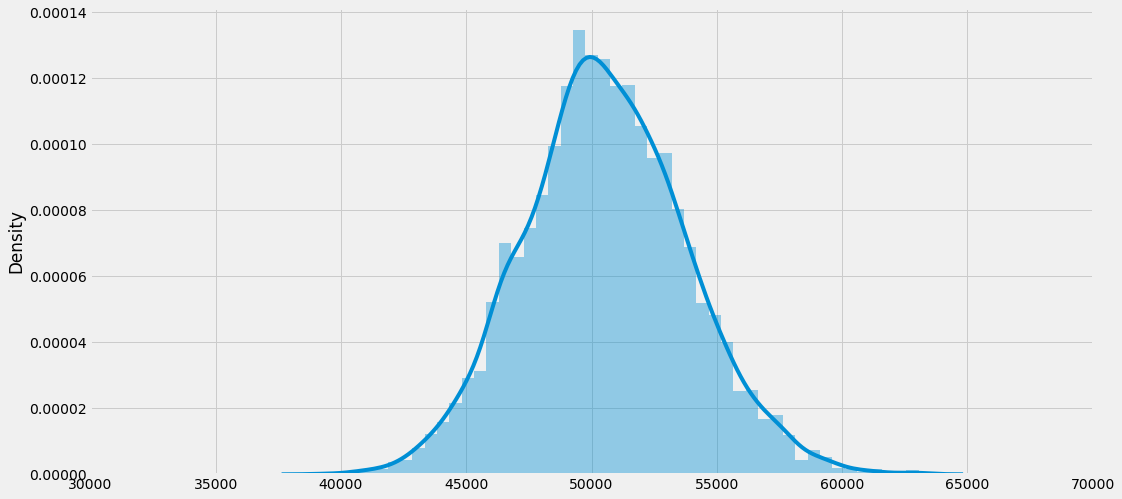

In [32]:
# Your Code Here
fig=plt.figure(figsize=(16, 8))
# Your Code Here - 1 line
sns.distplot(repeat_median)

plt.xlim(30000,70000)

## Task 1-3	

Please repeat your repeated sampling in Task 1-2, but now you need to increase the sample size from 200 to 500 and 1000. Comment on the shape of the sampling distribution of the median monthly salary. When the sample size increases, is the sampling distribution of the median monthly salary approaching a normal distribution? (Please draw a panel of histograms to present your visualization).

**Solution**

In [33]:
size500 = np.array([10, 114, 175, 123, 68, 9, 1], dtype = int)
size1000 = np.array([21, 229, 351, 245, 135, 17, 2], dtype = int)

repeat = 5000
repeat_median500 = np.zeros(repeat, dtype = float)
repeat_median1000 = np.zeros(repeat, dtype = float)

count = 1
while True:
    combined500 = posit_norm(pop_mean[0], pop_std[0], size500[0])
    combined1000 = posit_norm(pop_mean[0], pop_std[0], size1000[0])
    for i in range(1, len(pop_mean)):
        ### Write your code here for this loop
        sam500 = posit_norm(pop_mean[i], pop_std[i], size500[i])                                  # Complete your Code Here
        combined500 = np.concatenate((combined500, sam500))   
        
        sam1000 = posit_norm(pop_mean[i], pop_std[i], size1000[i])                                  # Complete your Code Here
        combined1000 = np.concatenate((combined1000, sam1000))
    
    repeat_median500[count-1] = np.median(combined500)     #Complete this line of code
    repeat_median1000[count-1] = np.median(combined1000)    #Complete this line of code
    if(count == repeat):
        break
    count += 1

/Users/charmainechew/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charmainechew/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charmainechew/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

(30000.0, 70000.0)

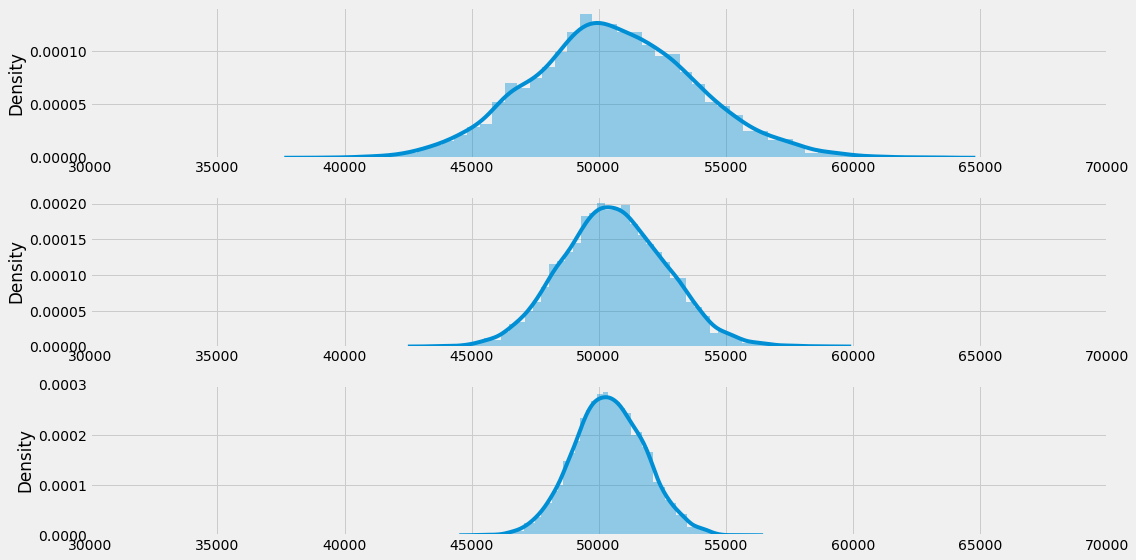

In [34]:
fig=plt.figure(figsize=(16, 8))

plt.subplot(3,1,1)
sns.distplot(repeat_median)
plt.xlim(30000,70000)

plt.subplot(3,1,2)
sns.distplot(repeat_median500)
plt.xlim(30000,70000)

plt.subplot(3,1,3)
sns.distplot(repeat_median1000)

plt.tight_layout()
plt.xlim(30000,70000)

/Users/charmainechew/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charmainechew/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charmainechew/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

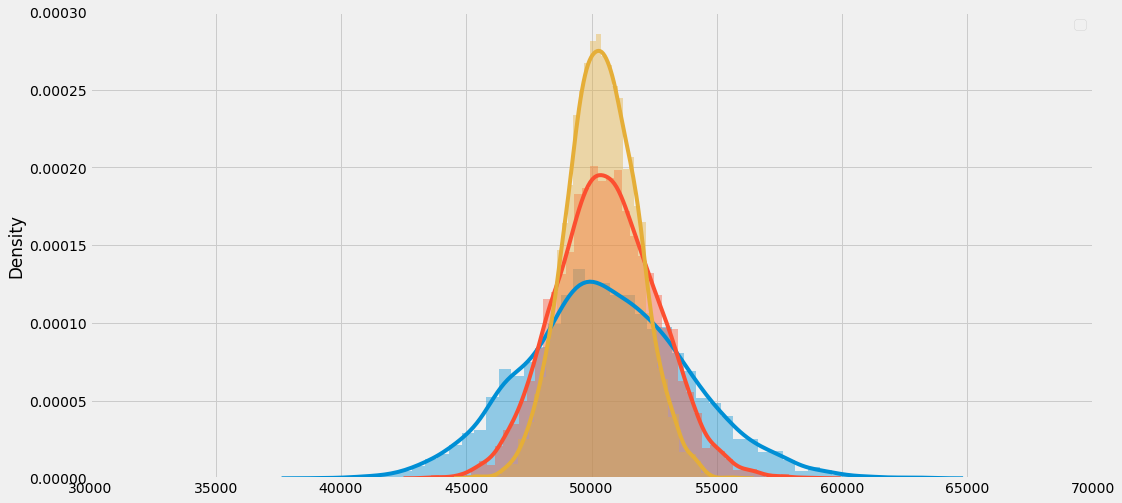

In [35]:
### Fill in the blanks in below code to complete the visualization of data

fig = plt.figure(figsize = (16, 8))
sns.distplot(repeat_median)
sns.distplot(repeat_median500)
sns.distplot(repeat_median1000)
plt.legend(loc = "best")
plt.xlim(30000,70000)
plt.show()